In [1]:
%load_ext autoreload
%autoreload 2
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import pandas as pd
from cuml.manifold.umap import UMAP as cumlUMAP
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### load data

In [3]:
DATASET_ID = 'swamp_sparrow'
df_loc =  DATA_DIR / 'syllable_dfs' / DATASET_ID / 'swampsparrow-taper_with_freq.pickle'

In [4]:
syllable_df = pd.read_pickle(df_loc)
del syllable_df['audio']

In [5]:
syllable_df[:3]

,start_time,end_time,syllable,pos_in_syllable,indv,indvi,key,rate,syll_len,f_start,f_end,spectrogram
0,0.1015,0.1160,0.0,0.0,NYMONT33,0,SWSP09MONT33P1,44100,0.014490,8182.617188,4780.371094,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,0.1460,0.2095,0.0,1.0,NYMONT33,0,SWSP09MONT33P1,44100,0.063492,7450.488281,4091.308594,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,0.2510,0.2620,1.0,0.0,NYMONT33,0,SWSP09MONT33P1,44100,0.010998,8699.414062,5684.765625,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


(0, 10)

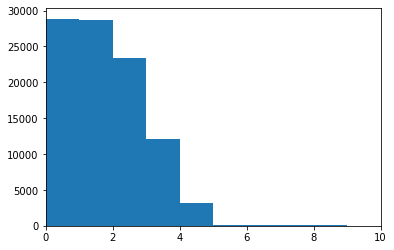

In [15]:
fig, ax = plt.subplots()
plt.hist(syllable_df.pos_in_syllable.values, bins=np.arange(10));
ax.set_xlim([0,10])

In [6]:
top_indv_df = pd.DataFrame(
    {indv: [np.sum(syllable_df.indv == indv)] for indv in syllable_df.indv.unique()}
).T.sort_values(by=[0], ascending=False)
top_indv_df.iloc[100]

0    208
Name: NYHVVLY29, dtype: int64

In [7]:
top_indvs = top_indv_df.index[:100]
top_indvs

Index(['NYADIRAQSI20', 'NYMONT12', 'PAGeneva08-64', 'WIHOR37', 'WIHOR64',
       'WIHOR85', 'WIHOR81', 'NYADIRAQBT15', 'NYADIRAQSI30', 'NYADIRAQBT24',
       'MIWAT50', 'NYADIRAQBT19', 'MIWAT13', 'NYHVVLY37', 'NYADIRAQBT08',
       'NYADIRAQSI08', 'NYHVVLY05', 'MIWAT56', 'NYADIRAQSI24', 'MIWAT28',
       'MIWAT12', 'PAGeneva08-23', 'MIWAT49', 'PAWatsonRun08-17',
       'PAConneaut08-082', 'MIWAT67', 'WIHOR07', 'NYADIRAQSI09', 'WIHOR86',
       'WIHOR05', 'PAConneaut08-110', 'PAWatsonRun08-16', 'PAGeneva08-10',
       'PAWatsonRun08-35', 'PAConneaut08-079', 'NYADIRAQBT06', 'NYADIRAQBT01',
       'PAWatsonRun08-03', 'NYADIRAQBT25', 'NYADIRAQSI01', 'PAConneaut08-021',
       'NYHVVLY14', 'NYADIRAQBT36', 'PAWatsonRun08-31', 'MIWAT25', 'NYMONT62',
       'NYHVTIV27', 'MIWAT22', 'PAGeneva08-35', 'NYHVTHO10',
       'PAWatsonRun08-19', 'NYADIRAQSI23', 'MIWAT47', 'NYADIRAQSI28',
       'NYHVVLY26', 'NYHVVLY07', 'NYMONT26', 'NYADIRAQBT07',
       'PAConneaut08-010', 'NYADIRAQSI13', 'NYHVVLY08',

### project

NYADIRAQSI20


(308, 704)


/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


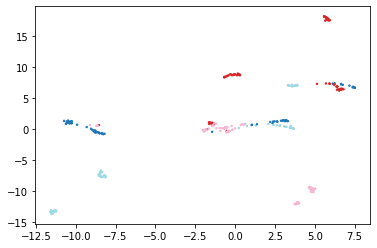

NYMONT12


(306, 704)


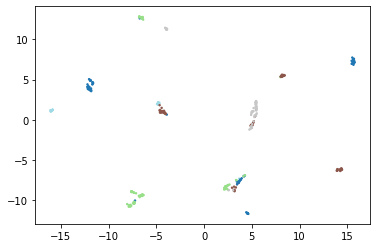

PAGeneva08-64


(304, 704)


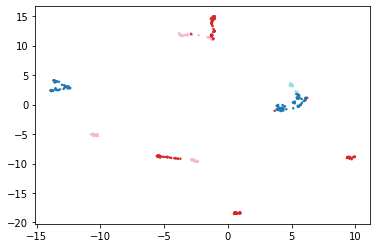

WIHOR37


(294, 704)


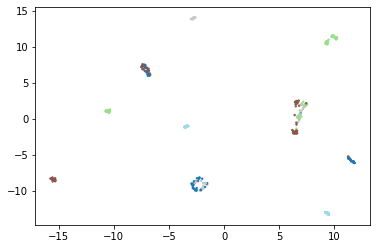

WIHOR64


(293, 704)


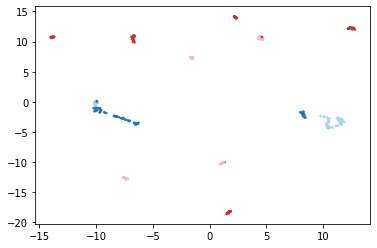

WIHOR85


(289, 704)


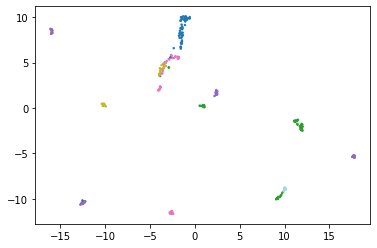

WIHOR81


(287, 704)


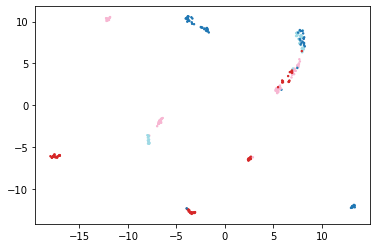

NYADIRAQBT15


(286, 704)


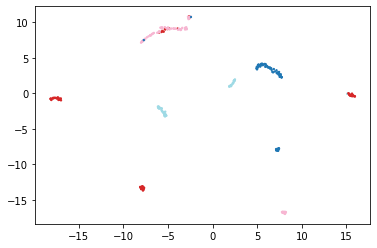

NYADIRAQSI30


(281, 704)


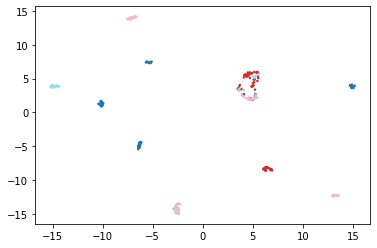

NYADIRAQBT24


(278, 704)


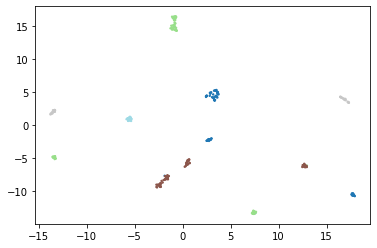

MIWAT50


(277, 704)


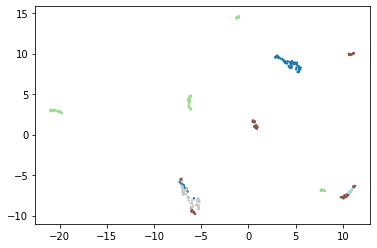

NYADIRAQBT19


(276, 704)


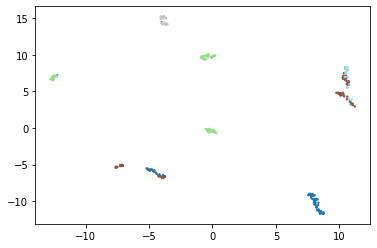

MIWAT13


(270, 704)


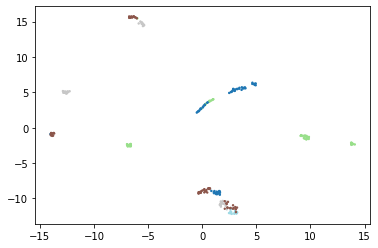

NYHVVLY37


(269, 704)


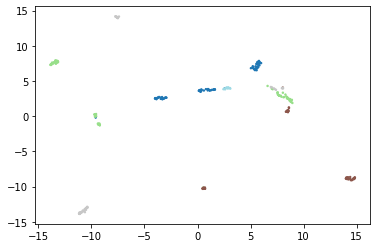

NYADIRAQBT08


(267, 704)


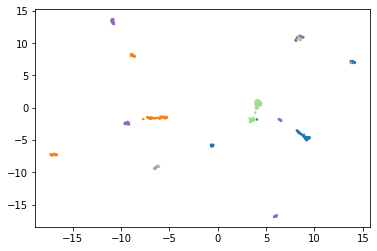

NYADIRAQSI08


(263, 704)


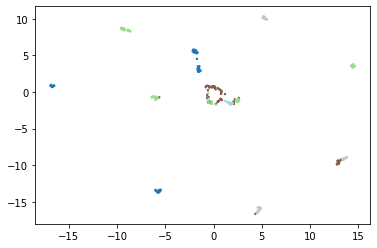

NYHVVLY05


(261, 704)


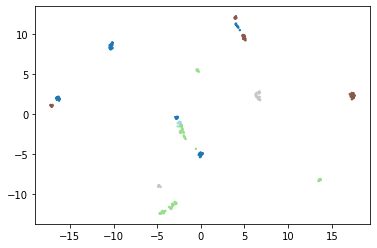

MIWAT56


(261, 704)


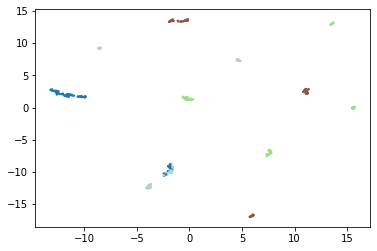

NYADIRAQSI24


(261, 704)


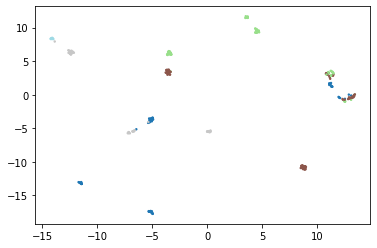

MIWAT28


(260, 704)


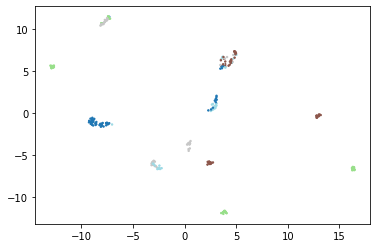

MIWAT12


(255, 704)


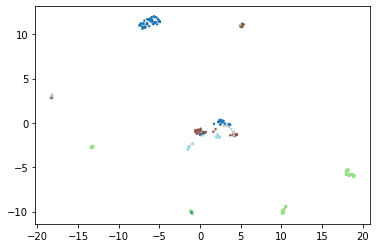

PAGeneva08-23


(254, 704)


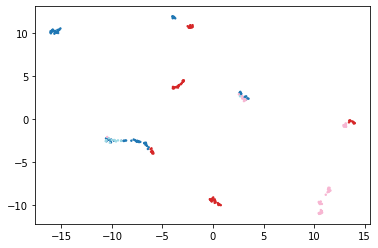

MIWAT49


(254, 704)


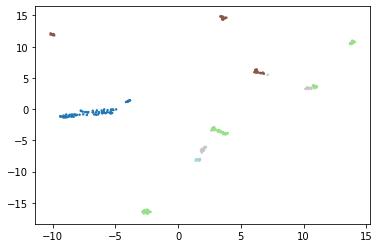

PAWatsonRun08-17


(253, 704)


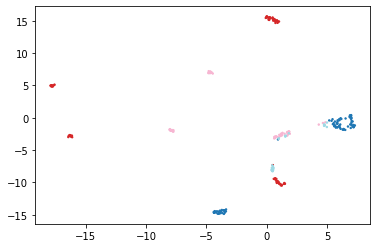

PAConneaut08-082


(252, 704)


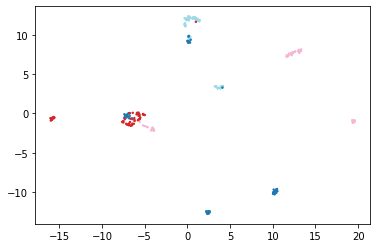

MIWAT67


(252, 704)


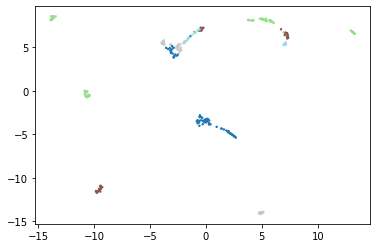

WIHOR07


(250, 704)


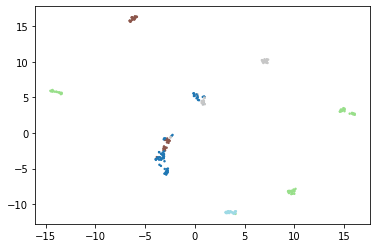

NYADIRAQSI09


(249, 704)


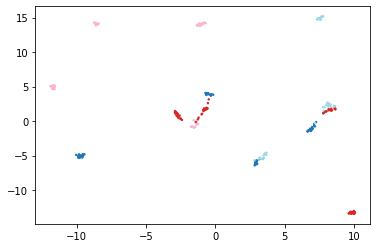

WIHOR86


(244, 704)


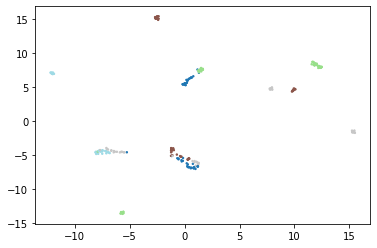

WIHOR05


(243, 704)


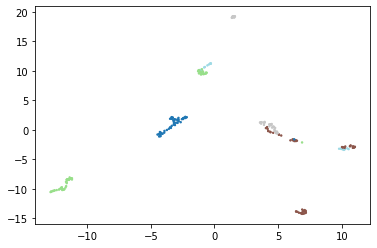

PAConneaut08-110


(243, 704)


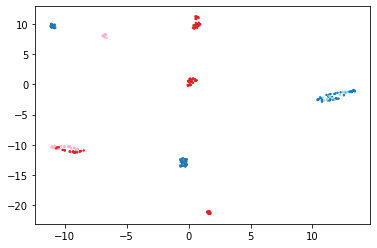

PAWatsonRun08-16


(242, 704)


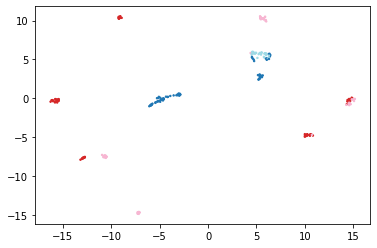

PAGeneva08-10


(242, 704)


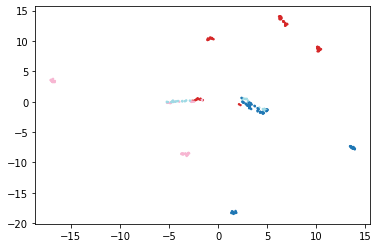

PAWatsonRun08-35


(241, 704)


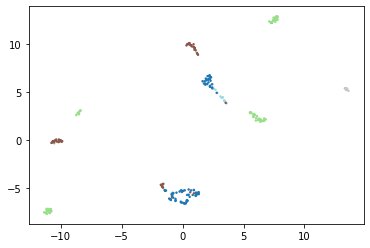

PAConneaut08-079


(240, 704)


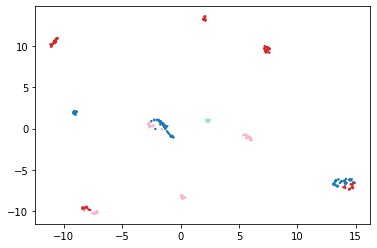

NYADIRAQBT06


(240, 704)


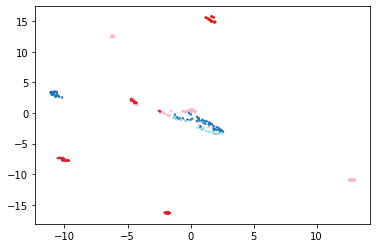

NYADIRAQBT01


(240, 704)


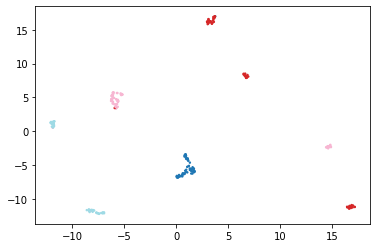

PAWatsonRun08-03


(239, 704)


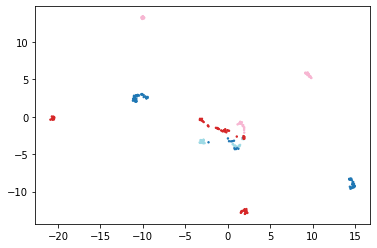

NYADIRAQBT25


(239, 704)


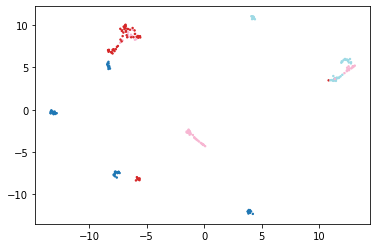

NYADIRAQSI01


(238, 704)


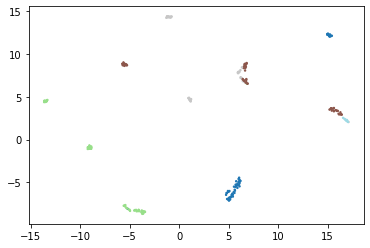

PAConneaut08-021


(238, 704)


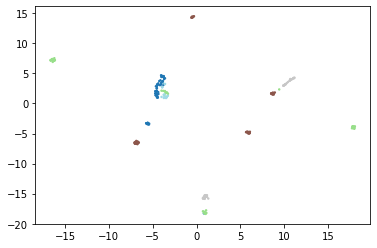

NYHVVLY14


(238, 704)


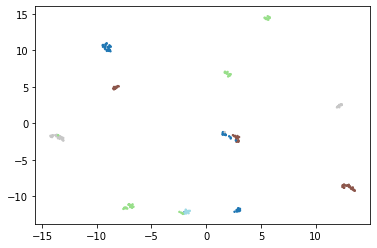

NYADIRAQBT36


(236, 704)


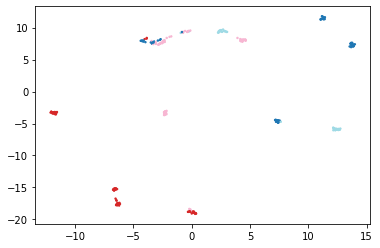

PAWatsonRun08-31


(236, 704)


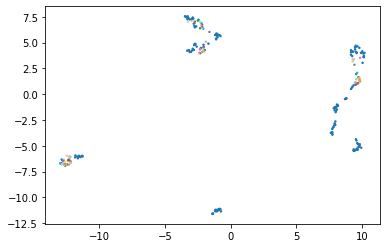

MIWAT25


(236, 704)


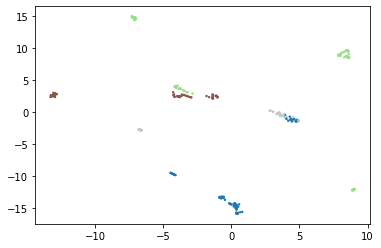

NYMONT62


(234, 704)


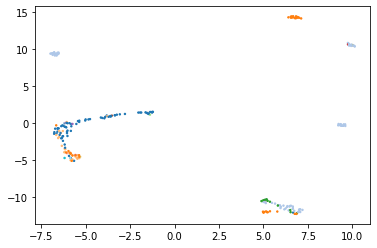

NYHVTIV27


(233, 704)


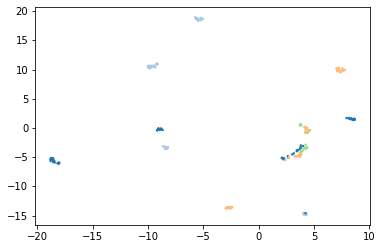

MIWAT22


(233, 704)


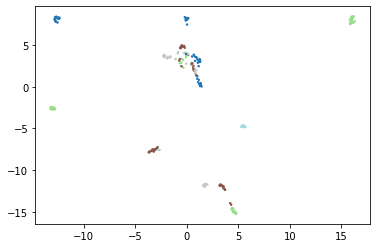

PAGeneva08-35


(232, 704)


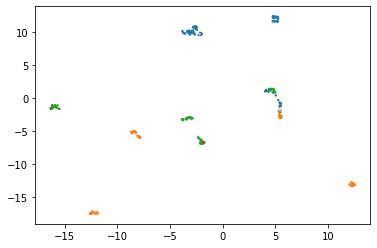

NYHVTHO10


(232, 704)


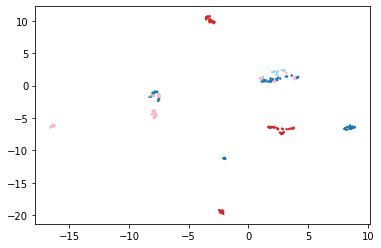

PAWatsonRun08-19


(232, 704)


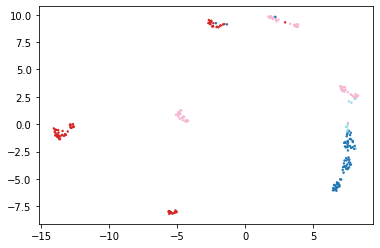

NYADIRAQSI23


(232, 704)


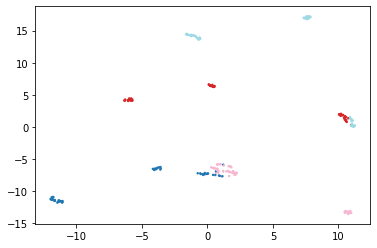

MIWAT47


(231, 704)


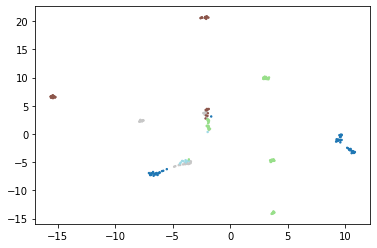

NYADIRAQSI28


(230, 704)


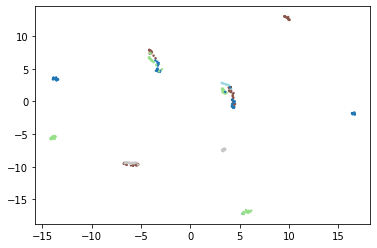

NYHVVLY26


(230, 704)


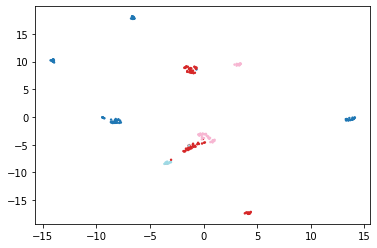

NYHVVLY07


(229, 704)


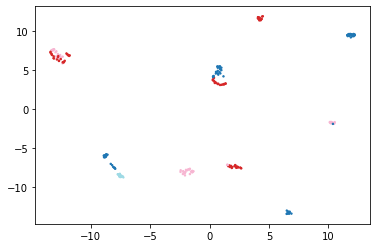

NYMONT26


(229, 704)


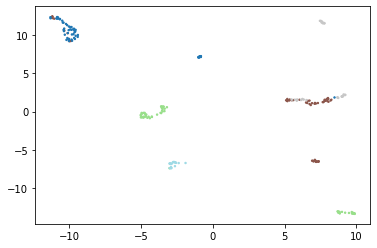

NYADIRAQBT07


(228, 704)


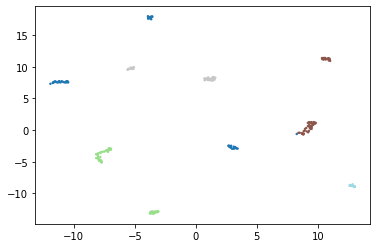

PAConneaut08-010


(228, 704)


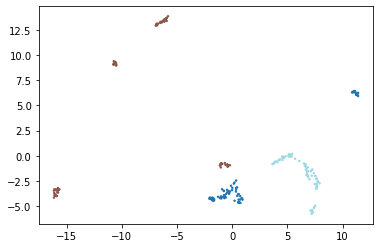

NYADIRAQSI13


(228, 704)


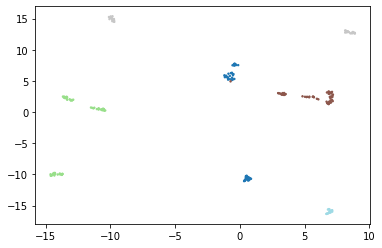

NYHVVLY08


(227, 704)


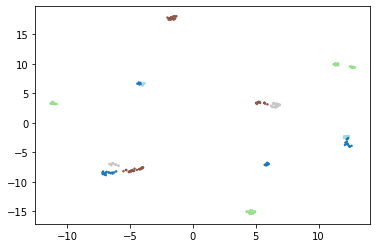

PAGeneva08-25


(227, 704)


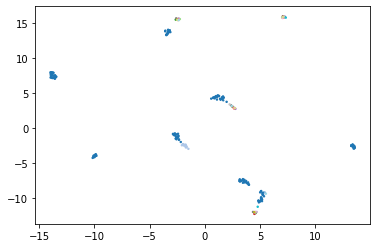

PAWatsonRun08-46


(227, 704)


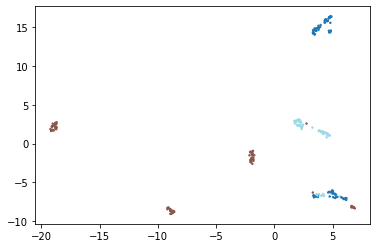

WIHOR47


(226, 704)


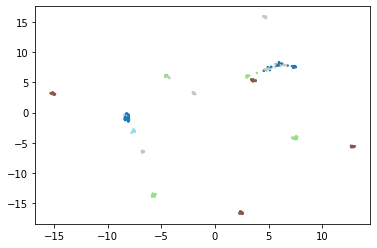

WIHOR89


(224, 704)


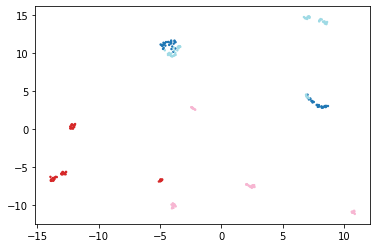

WIHOR40


(223, 704)


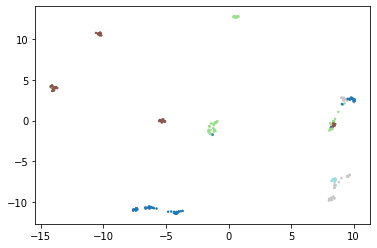

WIHOR20


(222, 704)


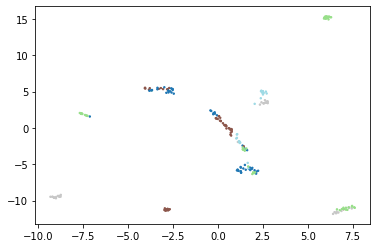

PAWatsonRun08-08


(221, 704)


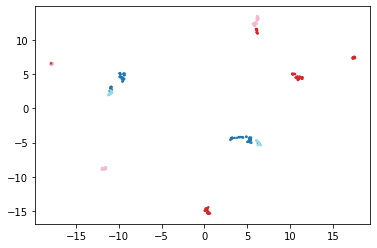

NYADIRAQSI26


(221, 704)


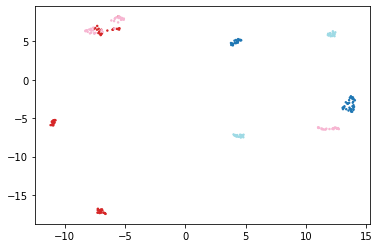

WIHOR46


(221, 704)


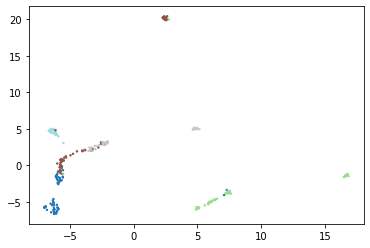

WIHOR91


(220, 704)


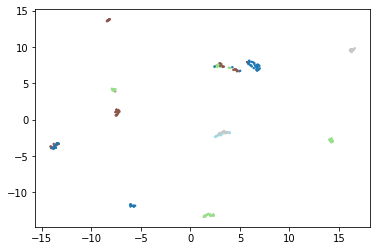

PAGeneva08-59


(220, 704)


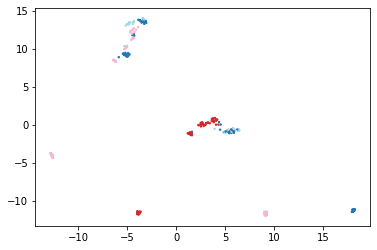

NYHVVLY38


(219, 704)


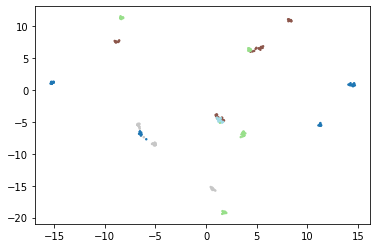

NYADIRAQSI17


(219, 704)


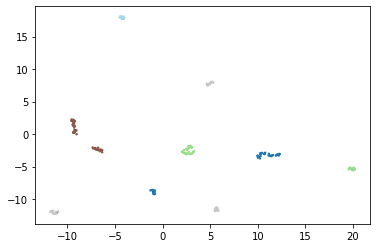

PAWatsonRun08-05


(219, 704)


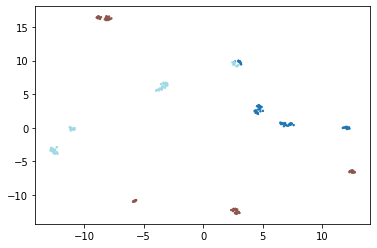

NYHVTIV23


(218, 704)


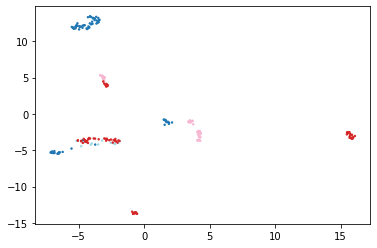

NYHVVLY21


(218, 704)


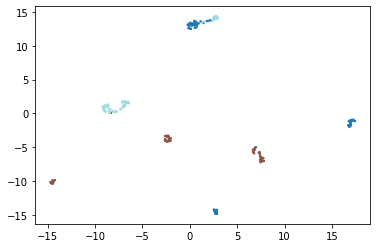

PAGeneva08-48


(217, 704)


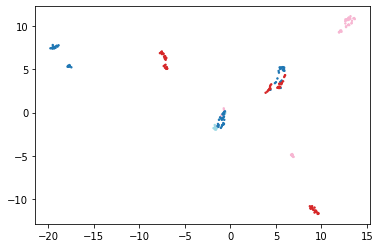

PAGeneva08-47


(216, 704)


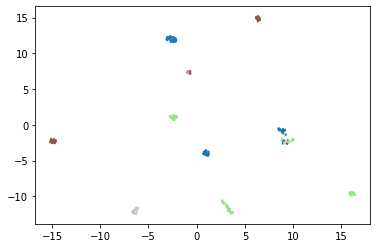

MIWAT52


(216, 704)


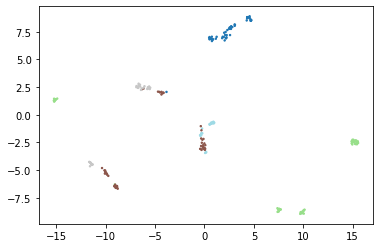

NYADIRAQBT23


(215, 704)


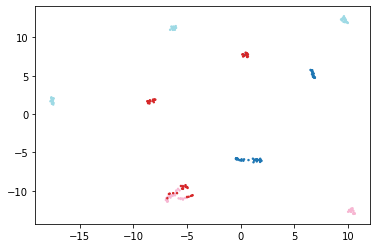

WIHOR62


(215, 704)


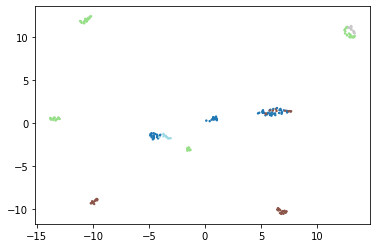

NYHVTHO28


(215, 704)


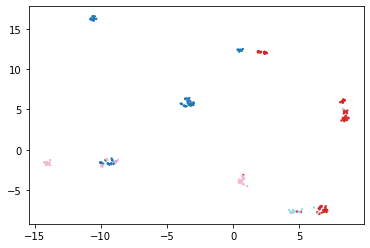

NYADIRAQSI04


(215, 704)


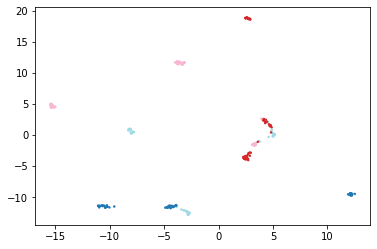

NYMONT18


(214, 704)


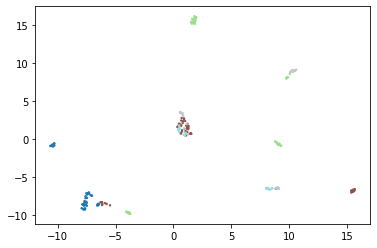

MIWAT06


(214, 704)


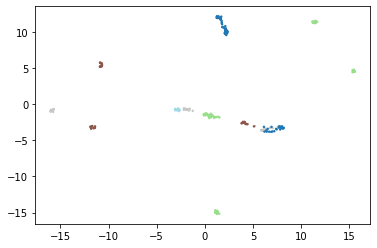

PAConneaut08-060


(213, 704)


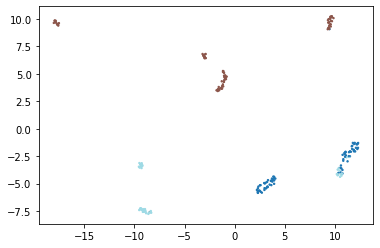

WIHOR43


(213, 704)


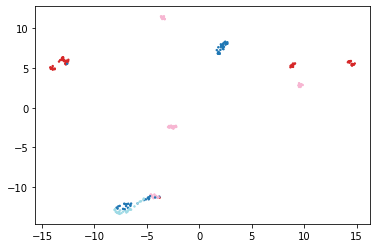

MIWAT14


(213, 704)


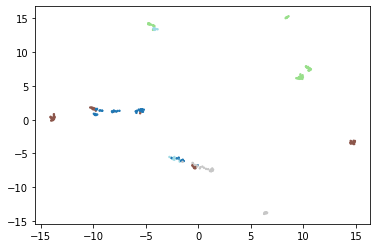

NYADIRAQBT02


(213, 704)


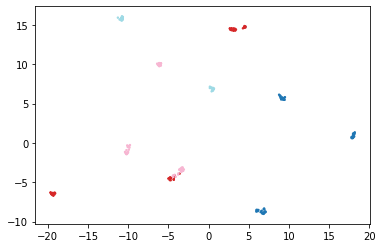

NYHVTHO09


(212, 704)


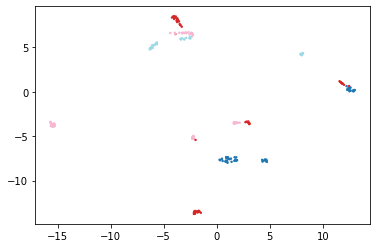

MIWAT53


(212, 704)


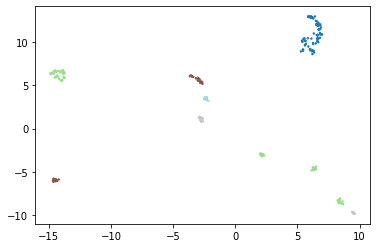

MIWAT38


(212, 704)


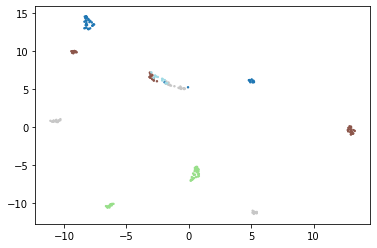

NYADIRAQBT09


(212, 704)


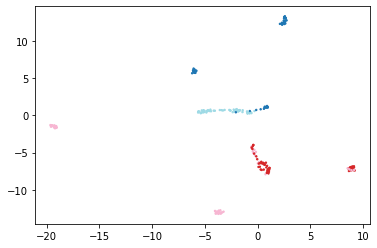

PAWatsonRun08-11


(212, 704)


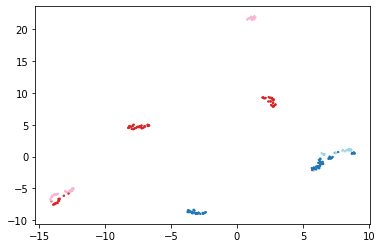

WIHOR35


(211, 704)


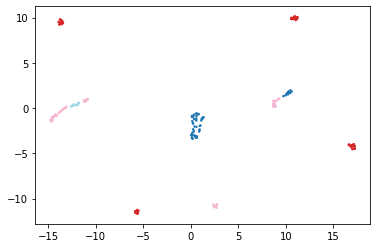

MIWAT36


(210, 704)


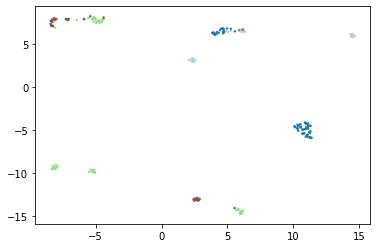

NYADIRAQSI22


(210, 704)


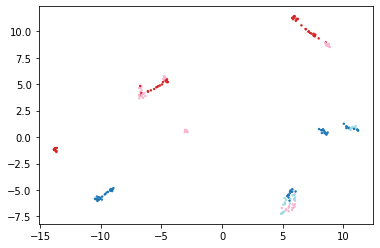

PAConneaut08-028


(209, 704)


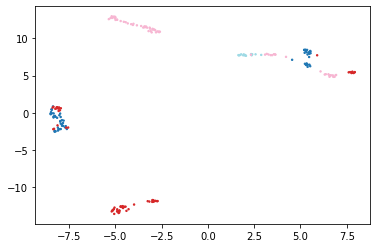

NYHVVLY20


(208, 704)


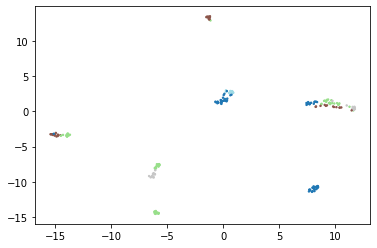

In [9]:
for indv in tqdm(top_indvs):
    subset_df = syllable_df[syllable_df.indv == indv]
    if len(subset_df) < 100:
        continue
    
    print(indv)
    specs = list(subset_df.spectrogram.values)
    specs = [i / np.max(i) for i in tqdm(specs, leave=False)]
    specs_flattened = flatten_spectrograms(specs)
    print(np.shape(specs_flattened))

    cuml_umap = cumlUMAP()
    embedding = cuml_umap.fit_transform(specs_flattened)
    subset_df["umap"] = list(embedding)

    unique_labs = np.unique(subset_df.pos_in_syllable.values)
    unique_labs_dict = {lab: i for i, lab in enumerate(unique_labs)}
    lab_list = [unique_labs_dict[i] for i in subset_df.pos_in_syllable.values]
    fig, ax = plt.subplots()
    ax.scatter(
        embedding[:, 0], embedding[:, 1], s=2, c=lab_list, cmap=plt.cm.tab20, alpha=1
    )
    #ax.set_xlim([-15, 15])
    #ax.set_ylim([-15, 15])
    plt.show()

    ensure_dir(DATA_DIR / 'embeddings' / DATASET_ID / 'indvs')
    subset_df.to_pickle(DATA_DIR / 'embeddings' / DATASET_ID / 'indvs' / (indv + '.pickle'))